In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_data = pd.read_excel("airlines.xlsx", parse_dates = ["Date_of_Journey"])

/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/623267986.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data = pd.read_excel("airlines.xlsx", parse_dates = ["Date_of_Journey"])


In [4]:
df_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df_data = df_data.dropna()
df_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df_data.isnull().any()


Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [7]:
df_data['Date_of_Journey'] = pd.to_datetime(df_data['Date_of_Journey'], format='%d/%m/%Y')
df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time'], format='%H:%M')


temp1= pd.to_datetime(df_data['Arrival_Time'], format='%H:%M %d %b', errors='coerce')
temp2 = pd.to_datetime(df_data['Arrival_Time'], format='%H:%M', errors='coerce')

df_data['Arrival_Time'] = temp1.fillna(temp2)

df_data


/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/4118224662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Date_of_Journey'] = pd.to_datetime(df_data['Date_of_Journey'], format='%d/%m/%Y')
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/4118224662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time'], format='%H:%M')
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/4118224662.py:8: SettingWithC

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648


In [8]:
df_data['Journey_day'] = df_data['Date_of_Journey'].dt.day
df_data['Journey_month'] = df_data['Date_of_Journey'].dt.month
df_data['Journey_year'] = df_data['Date_of_Journey'].dt.year
df_data['Dep_Time_hour'] = df_data['Dep_Time'].dt.hour
df_data['Dep_Time_minute'] = df_data['Dep_Time'].dt.minute
df_data['Arrival_Time_hour'] = df_data['Arrival_Time'].dt.hour
df_data['Arrival_Time_minute'] = df_data['Arrival_Time'].dt.minute
df_data


/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3930678572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Journey_day'] = df_data['Date_of_Journey'].dt.day
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3930678572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Journey_month'] = df_data['Date_of_Journey'].dt.month
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3930678572.py:3: SettingWithCopyWarning: 
A value is trying to be set on

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [10]:
bns = [pd.Timestamp('1900-01-01 00:00:00'),
       pd.Timestamp('1900-01-01 04:00:00'),
       pd.Timestamp('1900-01-01 08:00:00'),
       pd.Timestamp('1900-01-01 12:00:00'),
       pd.Timestamp('1900-01-01 16:00:00'),
       pd.Timestamp('1900-01-01 20:00:00'),
       pd.Timestamp('1900-01-01 23:59:59')]
df_data['dep_description'] = pd.cut(df_data['Dep_Time'], bins = bns, labels =["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"])
df_data

/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3379572403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['dep_description'] = pd.cut(df_data['Dep_Time'], bins = bns, labels =["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_description
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Late Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,Morning
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,Noon
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,Night
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,Night
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,Late Night
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,Noon
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,Noon


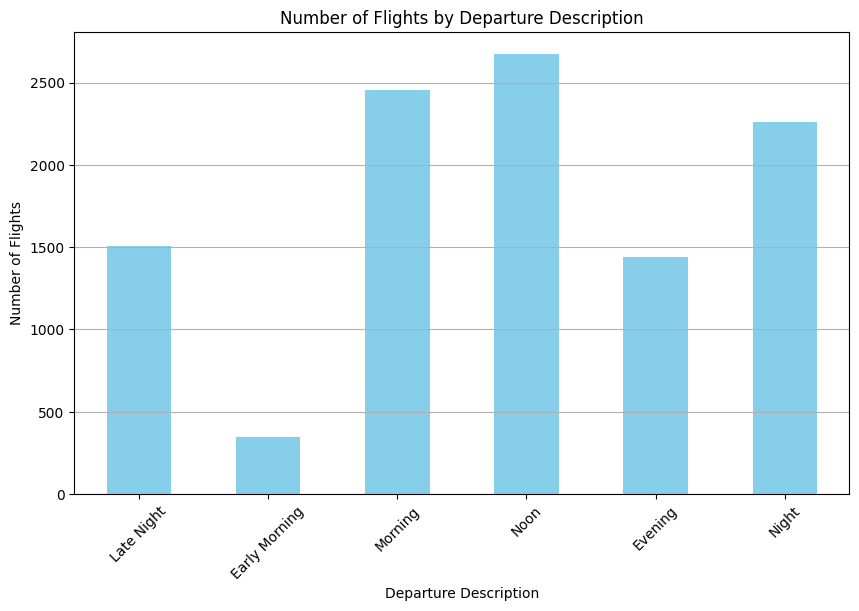

In [13]:

dep_description_counts = df_data['dep_description'].value_counts().reindex(
    ["Late Night", "Early Morning", "Morning", "Noon", "Evening", "Night"],
    fill_value=0
)
plt.figure(figsize=(10, 6))
dep_description_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Departure Description')
plt.xlabel('Departure Description')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y')


In [16]:
df_data['Duration_hours'] = df_data['Duration'].str.extract(r'(\d+)h', expand=False).astype(float)
df_data['Duration_mins'] = df_data['Duration'].str.extract(r'(\d+)m', expand=False).astype(float).fillna(0)

df_data['Duration_total_mins'] = df_data['Duration_hours'] * \
60 + df_data['Duration_mins']
    
df_data


/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3023120001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Duration_hours'] = df_data['Duration'].str.extract(r'(\d+)h', expand=False).astype(float)
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/3023120001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Duration_mins'] = df_data['Duration'].str.extract(r'(\d+)m', expand=False).astype(float).fillna(0)
/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ip

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_description,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-03-22 01:10:00,2h 50m,non-stop,No info,...,3,2019,22,20,1,10,Late Night,2.0,50.0,170.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,...,5,2019,5,50,13,15,Morning,7.0,25.0,445.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2 stops,No info,...,6,2019,9,25,4,25,Noon,19.0,0.0,1140.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,...,5,2019,18,5,23,30,Night,5.0,25.0,325.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,...,3,2019,16,50,21,35,Night,4.0,45.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,...,4,2019,19,55,22,25,Night,2.0,30.0,150.0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,...,4,2019,20,45,23,20,Late Night,2.0,35.0,155.0
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,...,4,2019,8,20,11,20,Noon,3.0,0.0,180.0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,...,3,2019,11,30,14,10,Noon,2.0,40.0,160.0


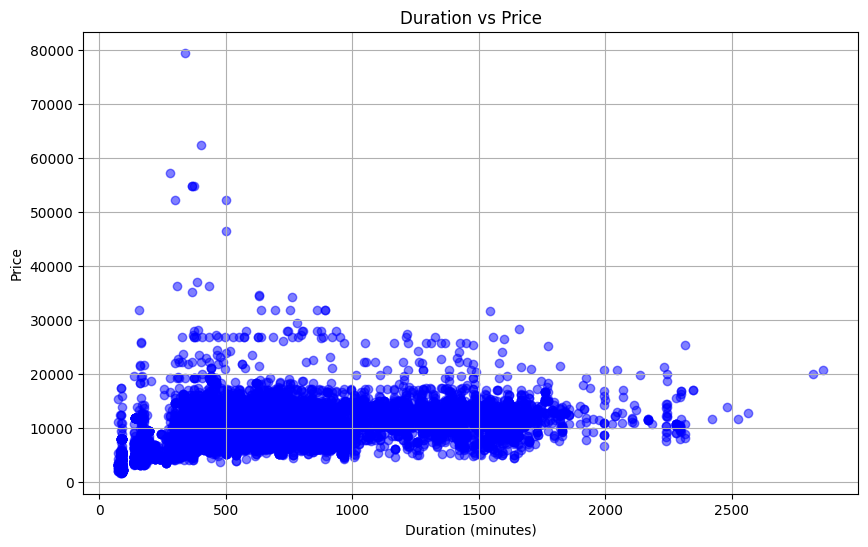

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df_data['Duration_total_mins'],
            df_data['Price'], color='blue', alpha=0.5)
plt.title('Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)


In [32]:
#linear regression didnt work without cleaning my data again idk if thats right :(
df_data = df_data.dropna()
df_data.isnull().any()



Airline                False
Date_of_Journey        False
Source                 False
Destination            False
Route                  False
Dep_Time               False
Arrival_Time           False
Duration               False
Total_Stops            False
Additional_Info        False
Price                  False
Journey_day            False
Journey_month          False
Journey_year           False
Dep_Time_hour          False
Dep_Time_minute        False
Arrival_Time_hour      False
Arrival_Time_minute    False
dep_description        False
Duration_hours         False
Duration_mins          False
Duration_total_mins    False
dtype: bool

/var/folders/gf/1x7jm9v12wl2hsp2h8n13rkr0000gp/T/ipykernel_1581/24026017.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


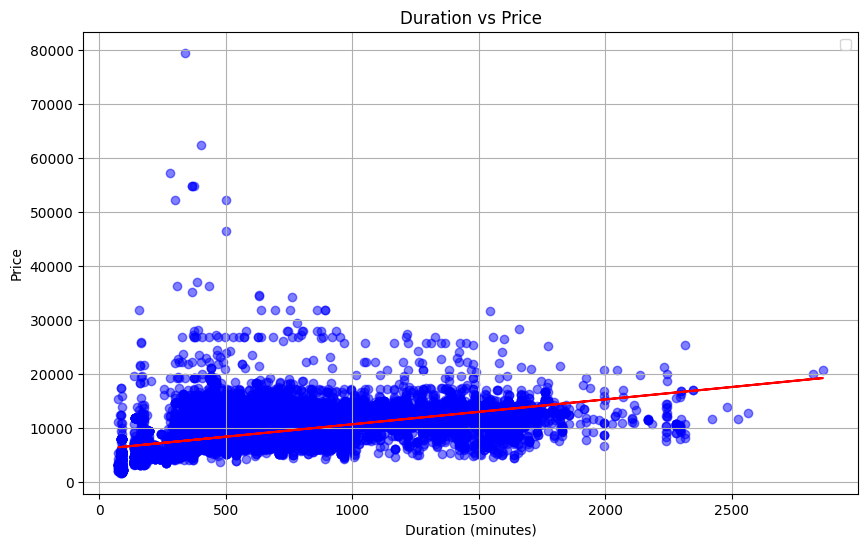

In [44]:


m, b = np.polyfit(df_data['Duration_total_mins'], df_data['Price'], 1)


plt.figure(figsize=(10, 6))
plt.scatter(df_data['Duration_total_mins'],df_data['Price'], color='blue', alpha=0.5)
plt.title('Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)

plt.plot(df_data['Duration_total_mins'], m * df_data['Duration_total_mins'] + b, color='red')

plt.legend()

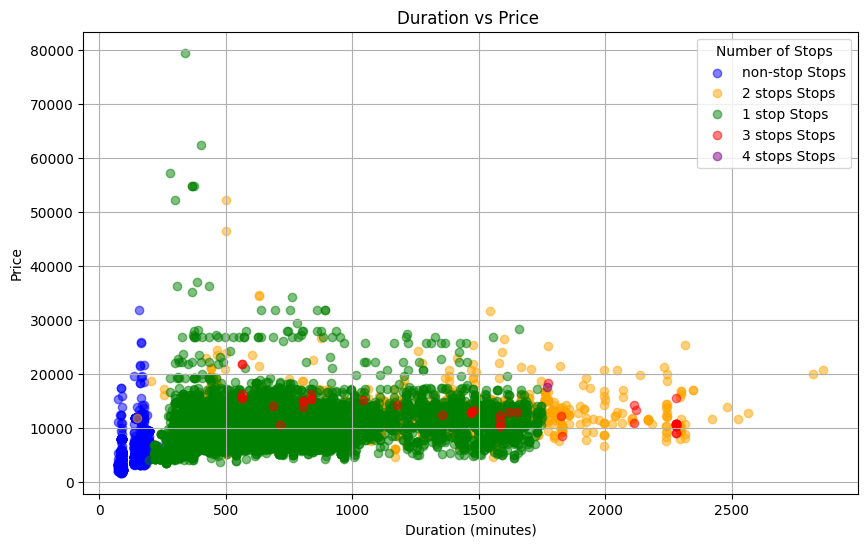

In [43]:

unique_stops = df_data['Total_Stops'].unique()
colors = ['blue', 'orange', 'green', 'red', 'purple',]

plt.figure(figsize=(10, 6))

for i, stop_count in enumerate(unique_stops):
    group_data = df_data[df_data['Total_Stops'] == stop_count] 
    plt.scatter(group_data['Duration_total_mins'], group_data['Price'],color=colors[i], label=f'{stop_count} Stops', alpha=0.5)

plt.title(
    'Duration vs Price ')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Number of Stops')
plt.show()

#non-stop flights are the quickest, 1 stop flights have a wide range, 2 stop flights have a longer range, 3 stop flights are few but are like 2 stop flights and 4 stop flights are rare


In [48]:
df_data[df_data['Airline'] == 'Jet Airways']['Route'].value_counts()
#CCU -> BOM -> BLR is the most used




Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

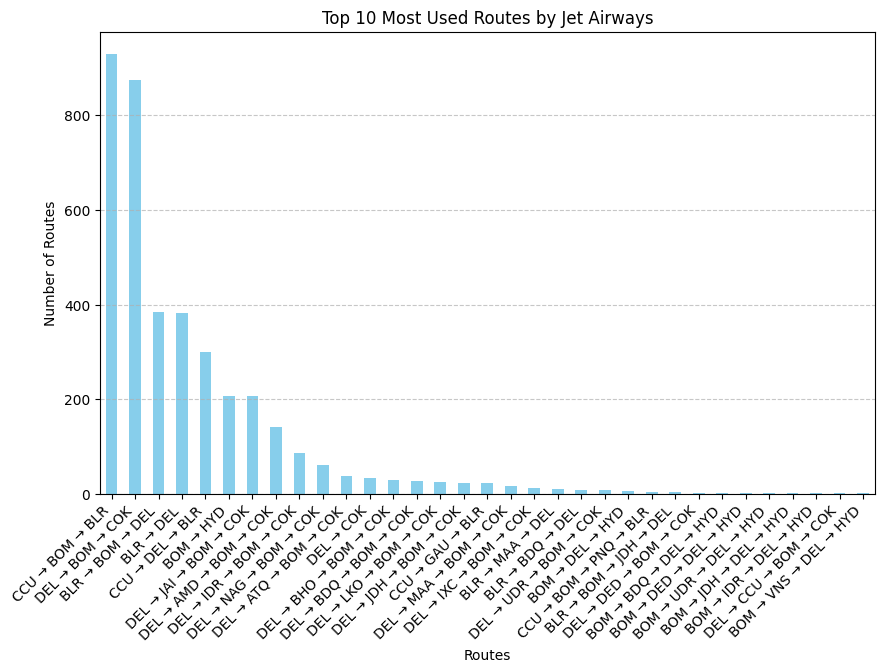

In [51]:
plt.figure(figsize=(10, 6))
df_data[df_data['Airline'] == 'Jet Airways']['Route'].value_counts().plot(
    kind='bar', color='skyblue')
plt.title('Top 10 Most Used Routes by Jet Airways')
plt.xlabel('Routes')
plt.ylabel('Number of Routes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
